In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from keras.datasets import cifar100

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#from sklearn.model_selection import train_test_split

In [6]:
(train_X, train_Y_),(test_X, test_Y_) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [7]:
from keras.utils import to_categorical

In [8]:
train_X = train_X.astype('float')/255
test_X = test_X.astype('float')/255

In [9]:
#train_X, val_X, train_Y_, val_Y_ = train_test_split(train_X, train_Y_, test_size = 0.1, random_state = 42)

In [10]:
#train_datagen = ImageDataGenerator(featurewise_center=True,horizontal_flip= True,featurewise_std_normalization=True,fill_mode='nearest'
                            #,rotation_range=20, width_shift_range=0.2,height_shift_range=0.2 )
#train_datagen.fit(train_X)

In [11]:
train_Y = to_categorical(train_Y_)
#val_Y = to_categorical(val_Y_)
test_Y = to_categorical(test_Y_)

In [12]:
from keras.models import Model

In [13]:
from keras.layers import Conv2D, Concatenate, Dense, BatchNormalization, Dropout, Input, AveragePooling2D, MaxPooling2D, Flatten

In [14]:
def createInceptionModule1(base_layer):
  #input_layer  = Input(shape = (base_layer.shape))
  conv_layer1 = Conv2D(filters = 16, kernel_size=(1,1), padding = 'same',activation='relu')(base_layer)
  #print(conv_layer1.shape)
  conv_layer2 = Conv2D(filters = 16, kernel_size=(1,1), padding = 'same', activation = 'relu')(base_layer)
  #print(conv_layer2.shape)
  pool_layer = MaxPooling2D(pool_size=(3,3),strides=(1,1), padding = 'same')(base_layer)
  #print(pool_layer.shape)
  conv_layer3 = Conv2D(filters = 16,kernel_size=(1,1), padding = 'same', activation = 'relu')(base_layer)
  conv_layer4 = Conv2D(filters = base_layer.shape[-1], kernel_size = (1,1), padding = 'same', activation = 'relu')(pool_layer)
  batch_norm1 = BatchNormalization()(conv_layer4)
  conv_layer5 = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer2)
  conv_layer6 = Conv2D(filters = 16, kernel_size = (3,3), padding ='same', activation = 'relu')(conv_layer3)
  conv_layer7 = Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu')(conv_layer6)
  batch_norm2 = BatchNormalization()(conv_layer7)
  out_layer = Concatenate(axis = -1)([conv_layer1,batch_norm1, conv_layer5,batch_norm2]) # Concatenates along the last axis of the tensor
  return out_layer

In [15]:
def createInceptionModule2(base_layer):
  #input_layer = Input(shape = (base_layer.shape))
  conv_layer1 = Conv2D(filters = 32, kernel_size = (1,1), padding = 'same', activation = 'relu' )(base_layer)
  conv_layer2 = Conv2D(filters = 16, kernel_size = (1,1), padding = 'same', activation = 'relu')(base_layer)
  conv_layer3 = Conv2D(filters = 16, kernel_size = (1,1), padding = 'same', activation = 'relu')(base_layer)
  pool_layer = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding= 'same')(base_layer)
  conv_layer4 = Conv2D(filters = 16, kernel_size = (1,7), padding = 'same', activation = 'relu')(conv_layer3)
  conv_layer5 = Conv2D(filters = base_layer.shape[-1], kernel_size=(1,1), padding = 'same', activation = 'relu')(pool_layer)
  batch_norm1 = BatchNormalization()(conv_layer5)
  conv_layer6 = Conv2D(filters = 16, kernel_size=(1,7), padding = 'same', activation = 'relu')(conv_layer2)
  conv_layer7 = Conv2D(filters = 16, kernel_size = (7,1), padding = 'same', activation = 'relu')(conv_layer4)
  batch_norm2 = BatchNormalization()(conv_layer7)
  conv_layer8 = Conv2D(filters = 16, kernel_size=(1,7), padding = 'same', activation = 'relu')(batch_norm2)
  conv_layer9 = Conv2D(filters = 32, kernel_size=(7,1), padding = 'same', activation = 'relu')(conv_layer6)
  conv_layer10 = Conv2D(filters = 32, kernel_size=(7,1), padding = 'same', activation = 'relu')(conv_layer8)
  batch_norm3 = BatchNormalization()(conv_layer10)
  out_layer = Concatenate(axis = -1)([conv_layer1, batch_norm1, conv_layer9, batch_norm3])
  return out_layer

In [16]:
def createInceptionModule3(base_layer):
  conv_layer1 = Conv2D(filters = 32, kernel_size=(1,1), padding ='same', activation = 'relu')(base_layer)
  pool_layer = MaxPooling2D(pool_size=(3,3),strides = (1,1), padding = 'same')(base_layer)
  conv_layer2 = Conv2D(filters = 16, kernel_size=(1,1), padding = 'same', activation = 'relu')(base_layer)
  conv_layer3 = Conv2D(filters = 16, kernel_size=(1,1), padding = 'same', activation = 'relu')(base_layer)
  batch_norm1 = BatchNormalization()(conv_layer3)
  conv_layer4 = Conv2D(filters = 16, kernel_size=(3,3), padding = 'same', activation = 'relu')(batch_norm1)
  conv_layer5 = Conv2D(filters = base_layer.shape[-1], kernel_size=(1,1), padding = 'same', activation = 'relu')(pool_layer)
  conv_layer6 = Conv2D(filters = 32, kernel_size=(3,1), padding = 'same', activation = 'relu')(conv_layer2)
  conv_layer7 = Conv2D(filters = 32, kernel_size=(1,3), padding = 'same', activation = 'relu')(conv_layer2)
  batch_norm2 = BatchNormalization()(conv_layer7)
  conv_layer8 = Conv2D(filters = 64, kernel_size = (3,1), padding = 'same', activation = 'relu')(conv_layer4)
  conv_layer9 = Conv2D(filters = 64, kernel_size = (1,3), padding = 'same', activation = 'relu')(conv_layer4)
  batch_norm3 = BatchNormalization()(conv_layer9)
  out_layer = Concatenate(axis = -1)([conv_layer1, conv_layer5, conv_layer6, batch_norm1, conv_layer8,batch_norm2])
  return out_layer

In [17]:
def create_InceptionV2(input_shape):
  input_layer = Input(shape = input_shape)
  conv_layer1 = Conv2D(filters = 32, kernel_size = (3,3),strides = (2,2), padding = 'same', activation = 'relu')(input_layer)
  #print(conv_layer1.shape)
  conv_layer2 = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(conv_layer1)
  #print(conv_layer2.shape)
  conv_layer3 = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(conv_layer2)
  #print(conv_layer3.shape)
  pool_layer = MaxPooling2D(pool_size=(3,3), strides = (2,2))(conv_layer3)
  #print(pool_layer.shape)
  conv_layer4 = Conv2D(filters = 64, kernel_size = (3,3),strides = (1,1), padding = 'same', activation = 'relu')(pool_layer)
  #print(conv_layer4.shape)
  conv_layer5 = Conv2D(filters = 128, kernel_size = (3,3),strides = (2,2), padding = 'same', activation = 'relu')(conv_layer4)
  #print(conv_layer5.shape)
  conv_layer6 = Conv2D(filters = 128, kernel_size = (3,3),strides = (1,1), padding = 'same', activation = 'relu')(conv_layer5)
  batch_norm1  = BatchNormalization()(conv_layer6)
  #print(conv_layer6.shape)
  inception_layer1a = createInceptionModule1(conv_layer6)
  inception_layer1b = createInceptionModule1(inception_layer1a)
  #inception_layer1c = createInceptionModule1(inception_layer1b)
  inception_layer2a = createInceptionModule2(inception_layer1b)
  inception_layer2b = createInceptionModule2(inception_layer2a)
 # inception_layer2c = createInceptionModule2(inception_layer2b)
  #inception_layer2d = createInceptionModule2(inception_layer2c)
  #inception_layer2e = createInceptionModule2(inception_layer2d)
  inception_layer3a = createInceptionModule3(inception_layer2b)
  #inception_layer3b = createInceptionModule3(inception_layer3a)
  pool_layer2 = MaxPooling2D(pool_size=(8,8), strides= (1,1), padding = 'same')(inception_layer3a)
  flatten_layer = Flatten()(pool_layer2)
  dense_layer1 = Dense(units = 512, activation = 'relu')(flatten_layer)
  output = Dense(units = 100, activation = 'softmax')(dense_layer1)
  inception_model = Model(inputs = input_layer, outputs = output)
  return inception_model

In [18]:
input = train_X.shape[1:]

In [19]:
model = create_InceptionV2(input)

In [20]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   36928       conv2d_1[0][0]                   
_______________________________________________________________________________________

In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [23]:
path = F'/content/gdrive/My Drive/Weights/InceptionV2_RMSProp_BatchNormalization.h5'

In [24]:
earlyStopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',  patience= 50)
modelCheckpoint = keras.callbacks.ModelCheckpoint(filepath = path, monitor = 'val_accuracy', verbose= 2, save_best_only=True, save_weights_only=True, mode = 'max')

In [25]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [26]:
history = model.fit(train_X, train_Y, batch_size= 32, validation_split=0.1, epochs = 200, callbacks=[modelCheckpoint,earlyStopping])

Epoch 1/200
1407/1407 [==============================] - ETA: 0s - loss: 4.4328 - accuracy: 0.0385
Epoch 00001: val_accuracy improved from -inf to 0.03920, saving model to /content/gdrive/My Drive/Weights/InceptionV2_RMSProp_BatchNormalization.h5
1407/1407 [==============================] - 114s 81ms/step - loss: 4.4328 - accuracy: 0.0385 - val_loss: 4.5541 - val_accuracy: 0.0392
Epoch 2/200
1407/1407 [==============================] - ETA: 0s - loss: 3.9747 - accuracy: 0.0684
Epoch 00002: val_accuracy improved from 0.03920 to 0.04940, saving model to /content/gdrive/My Drive/Weights/InceptionV2_RMSProp_BatchNormalization.h5
1407/1407 [==============================] - 119s 85ms/step - loss: 3.9747 - accuracy: 0.0684 - val_loss: 4.1189 - val_accuracy: 0.0494
Epoch 3/200
1407/1407 [==============================] - ETA: 0s - loss: 3.7674 - accuracy: 0.0959
Epoch 00003: val_accuracy did not improve from 0.04940
1407/1407 [==============================] - 117s 83ms/step - loss: 3.7674 - 

In [42]:
model.load_weights('/content/gdrive/My Drive/Weights/InceptionV2_RMSProp_BatchNormalization.h5')

In [43]:
y_pred = model.predict(test_X)

In [44]:
y_pred = y_pred.argmax(-1)

In [45]:
y_true = test_Y.argmax(-1)

In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [47]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [48]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [49]:
print('Precision:', prec)

Precision: 0.3567058495459985


In [50]:
print('Recall', recall)

Recall 0.3306


In [51]:
print('Accuracy', accuracy)

Accuracy 0.3306


In [52]:
import pandas as pd

In [53]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [54]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0
1,1,28,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,5,0,0,0,1,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,1,0,0,0,0,1,0
2,0,1,19,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,2,0,0,7,2,0,0,0,1,0,0,1,0,0,3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,0,0,0,12,3,0,0,2,0,0,0,1,1,0,2,1,0,0,0,1,0,7,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,1,0,0,0,3,0,0,0,0,0,0,0,6,1,1,4,0,0,0,0,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,8,19,0,1,1,1,0,1,0,0,0,2,2,0,0,1,2,0,0,0,0,1,0,1,2,0,3,0,2,1,0,2,0,2,1,0,0,0,0,3,2,2,2,1,0,0,0,8,0,0,0,0,6,0,0,0,0,0,1,0,5,5,2,3,1,0,0,0,0,4,0,7,1,0,2,1,0,4,0,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,3,1,0
5,1,1,1,0,0,44,0,0,0,1,6,2,3,0,0,0,3,0,1,1,19,0,2,0,0,14,2,1,1,1,0,0,1,0,1,0,0,3,0,1,2,1,0,0,0,4,0,0,0,0,4,2,0,1,0,1,0,1,3,0,0,1,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,12,1,3,10,0,1,1,2,0,0,1,0,0,0,1,0
6,0,0,1,2,1,0,28,10,0,1,0,0,0,0,5,0,0,0,4,0,0,0,0,0,8,0,3,0,0,3,0,2,1,0,2,0,1,0,0,0,0,2,2,0,0,4,0,0,0,0,2,1,0,2,1,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,6,2,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,2,0,0,1,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,33,0,0,1,0,1,0,0,0,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


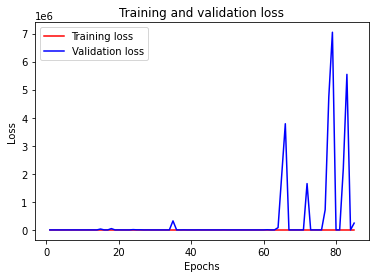

In [56]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()